In [203]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import pairwise_distances

distance_matrix = pairwise_distances(X, metric='euclidean')

In [204]:
dataset = pd.read_csv('https://raw.githubusercontent.com/palles77/MachineLearning_Exercise4/main/Employee_Compensation_SF.csv')


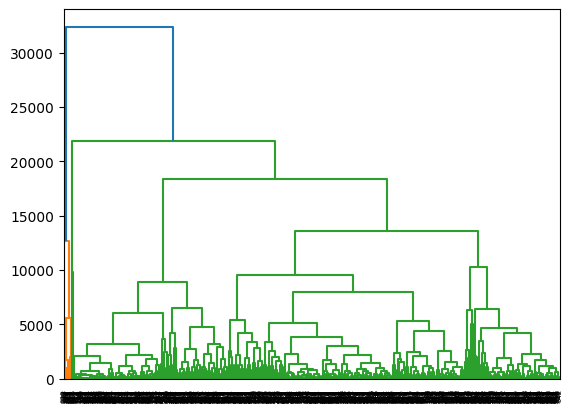

In [205]:
# function returning column index in a dataframe
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

# reading 'Total Benefits' -> column 20, 'Total Compensation' -> column 21
(column_first, colum_second) = column_index(dataset, ['Health/Dental', 'Other Benefits'])
# get sample 1000 rows
dataset_for_clustering = dataset.sample(1000).iloc[:, [column_first, colum_second]].values
X = dataset_for_clustering
# Drawing dendrogram
dendrogram = sch.dendrogram(sch.linkage(dataset_for_clustering, method='complete'))


In [206]:
model = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='complete')
model.fit(distance_matrix)
labels = model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


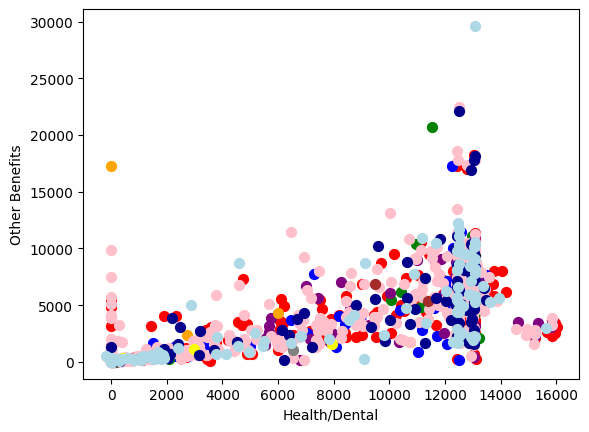

In [207]:
# Drawing Clusters
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='pink')
plt.scatter(X[labels==6, 0], X[labels==6, 1], s=50, marker='o', color='brown')
plt.scatter(X[labels==7, 0], X[labels==7, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels==8, 0], X[labels==8, 1], s=50, marker='o', color='black')
plt.scatter(X[labels==9, 0], X[labels==9, 1], s=50, marker='o', color='darkblue')
plt.scatter(X[labels==10, 0], X[labels==10, 1], s=50, marker='o', color='gray')
plt.scatter(X[labels==11, 0], X[labels==11, 1], s=50, marker='o', color='lightblue')
plt.xlabel('Health/Dental')
plt.ylabel('Other Benefits')
plt.show()